In [1]:
!pip install numpy
!pip install matplotlib

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Step1:
Processing Input Data, In this case we will simply generate input data using numpy.

Lets take height and weight of 30 people

In [47]:
non_obese_height = np.random.normal(loc=5.5,size=30,scale=0.5)
print(non_obese_height)

non_obese_weight = np.random.normal(loc=60,size=30,scale=2.5)
print(non_obese_weight)


obese_height = np.random.normal(loc=4,size=30,scale=0.5)
print(obese_height)

obese_weight = np.random.normal(loc=75,size=30,scale=2)
print(obese_weight)

[5.96005132 5.18996459 5.86814181 5.44311692 6.15128994 4.76392776
 5.73462068 5.23972952 5.00069833 4.89281921 6.32462031 5.18065186
 5.43441594 5.84246411 5.3748392  5.91253098 5.24226078 5.22960392
 5.41221711 5.17224803 5.99226112 5.74137119 4.62711787 5.8707664
 5.59542661 5.30198396 6.25186133 4.95019476 5.59513207 6.10270815]
[61.73179568 59.2966294  58.73541931 59.39475621 59.75559722 61.00048836
 58.7967875  62.12087468 61.96899148 64.62260912 59.32174011 56.84946982
 62.09666815 60.67100679 59.21100857 60.27695026 55.9021976  55.24792873
 60.5125602  60.79323507 56.21307217 62.8108368  59.19006283 61.92294164
 59.57751478 60.91976116 56.07251845 59.96550796 62.05158886 59.77202332]
[3.56988061 3.64683987 4.10884491 3.20880361 3.50181778 4.37972861
 4.0668543  4.64342303 4.44007858 4.19209194 3.91929601 4.37358946
 3.83815152 4.72140119 4.77736609 4.60595159 4.74641414 3.92424945
 4.22441954 3.45583041 4.45505099 3.95276258 3.71432303 3.88548382
 4.1396556  3.50320423 4.876667

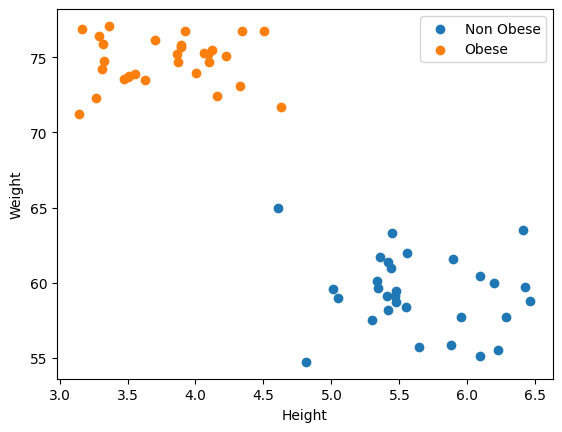

In [39]:
plt.scatter(non_obese_height,non_obese_weight)
plt.scatter(obese_height,obese_weight)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(["Non Obese","Obese"])
plt.show()

#Step 2
Space of All possible solutions(Hypothesis)

For x -> Hypothesis -> Y

Lets Build a classifier line that separates people who are obese and not. It can be a straight line that separates both categories

Linear algebra equation for a straight line
ax+by+c=0
x = height
y = weight

This is a standard form of line

https://www.youtube.com/watch?v=-DnmoFnQUtk



In [58]:

non_obese_arr = np.array([non_obese_height,non_obese_weight])
obese_arr= np.array([obese_height,obese_weight])

best_a=None
best_b=None

obese_arr_1 = np.array([list(row) for row in zip(obese_arr[0], obese_arr[1])])
non_obese_arr_1 = np.array([list(row) for row in zip(non_obese_arr[0], non_obese_arr[1])])

k=5
for i in range(k):
  a_b = np.random.normal(size=2) # generates array random values for a and b
  c = np.random.normal()
  print(a_b)
  print(c)


[0.50874879 0.23071433]
-0.006804132868775718
[-0.5475816  -1.38834572]
0.6589420183518174
[0.3977429  0.39498143]
0.4979406994172637
[ 0.28662483 -0.29259271]
-0.4691722429074129
[1.01976044 0.97472043]
0.5099388188488051


#Step 3:
#Finding right solution
Since we can have number of lines, we should always find a line which best fits (separates diff categories like obese and non obese)

One of the properties of linear equation ax+by+c=0 is for a given a,b,c. If we try to replace a (x,y) value in above equation, it will be either a positive or a negative number
So for a random a,b,c values, if we put our (height,weight) we should always get a positive number or a negative number
So if the line eq is perfect then all our obese data points will be completely positive then non_obese data points will be completely negative respectively or vice versa

ideally if we find a best line which better satisfies above condition

This is also called **Loss Function** calculation. And loss should be minimal

In [93]:
def compute_error(obese_items,non_obese_items,a_b_1,c1):
  error = 0
  for obese_item in obese_items:
    x = obese_item[0]
    y = obese_item[1]

    #print(str(x)+"  "+str(y)+"   "+str(a_b_1[0]*x+a_b_1[1]*y+c1) + "  "+str(a_b_1[0])+"  "+str(a_b_1[1])+"  "+str(c1))

    if (a_b_1[0]*x+a_b_1[1]*y+c1) <=0:
      error += 1
  #print("-------------------------------------------------------" + str(error))
  for non_obese_item in non_obese_items:
    x = non_obese_item[0]
    y = non_obese_item[1]
    #print(str(x)+"  "+str(y)+"   "+str(a_b_1[0]*x+a_b_1[1]*y+c1) + "  "+str(a_b_1[0])+"  "+str(a_b_1[1])+"  "+str(c1))
    if (a_b_1[0]*x+a_b_1[1]*y+c1) >=0:
      error += 1
  #print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" + str(error))
  return error

In [107]:
k = 1000
best_a_b = None
best_c = None
best_error = float('inf')

for i in range(k):
  a_b = np.random.normal(size=2) #[2.3,-0.3]
  c = np.random.normal() #8.7

  #print(str(a_b) + "  " + str(c))

  error = compute_error(obese_arr_1,non_obese_arr_1,a_b,c)
  if error < best_error:
    print("Iteration: "+str(i)+"  Error:"+str(error))
    best_a_b = a_b
    best_c = c
    best_error = error

print("---------------------")
print(best_a_b)
print(best_c)
print(best_error)

Iteration: 0  Error:30
Iteration: 86  Error:14
Iteration: 492  Error:6
Iteration: 669  Error:0
---------------------
[-2.46906248  0.1552393 ]
1.3065556692594047
0


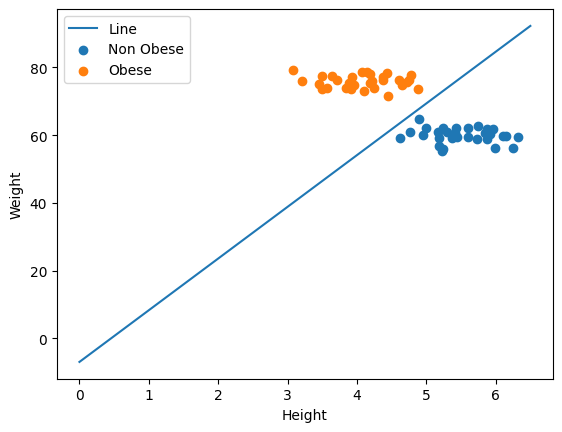

In [103]:
x = np.linspace(0, 6.5, 100)
# Calculate corresponding y values for the line
y = (-best_a_b[0] * x - best_c) / best_a_b[1] #(-a * x - c) / b

# Plot the line
plt.plot(x, y)


plt.scatter(non_obese_height,non_obese_weight)
plt.scatter(obese_height,obese_weight)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(["Line","Non Obese","Obese"])
#plt.xlim(0)  # Set the lower limit of the x-axis to 0
#plt.ylim(0)  # Set the lower limit of the y-axis to 0
plt.show()